In [3]:
## Quantidade de semáforos espalhados por Fortaleza

import geopandas as gpd

# Carrega o arquivo
FILE_PATH = "semaforos.geojson"
gdfile = gpd.read_file(FILE_PATH)
gdfile.head()

print(f"Quantidade de semáforos espalhados por Fortaleza: {len(gdfile)}")

Quantidade de semáforos espalhados por Fortaleza: 1100


In [4]:
## Análise dos dados -- Quantidade de semáforos por bairro

gdfile['BAIRRO'].value_counts()



BAIRRO
CENTRO             137
ALDEOTA            117
MEIRELES            44
DIONÍSIO TORRES     35
MESSEJANA           32
                  ... 
PARQUE SÃO JOSÉ      1
FLORESTA             1
PAUPINA              1
ARACAPÉ              1
BARROSO              1
Name: count, Length: 105, dtype: int64

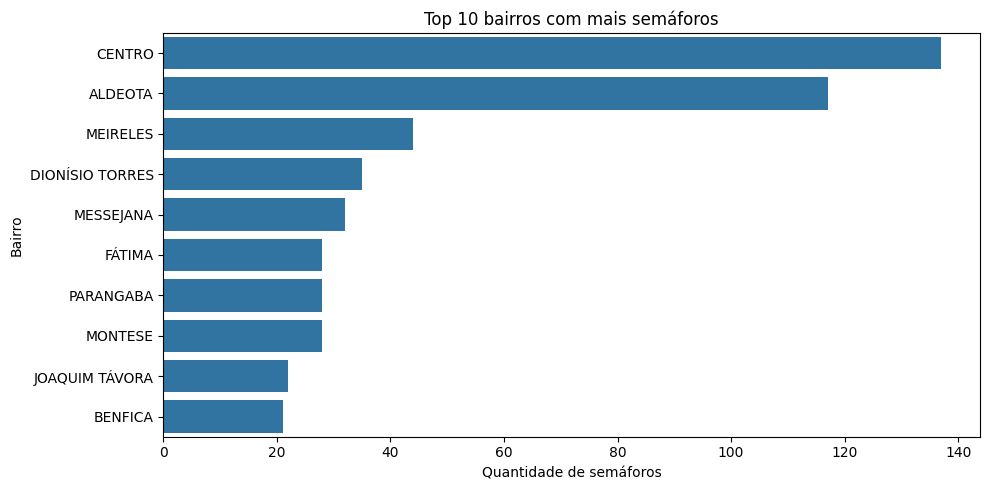

In [5]:
## Gera gráfico TOP 10 BAIRROS COM MAIS SEMÁFOROS

import matplotlib.pyplot as plt
import seaborn as sns

top_bairros = gdfile['BAIRRO'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_bairros.values, y=top_bairros.index)
plt.title("Top 10 bairros com mais semáforos")
plt.xlabel("Quantidade de semáforos")
plt.ylabel("Bairro")
plt.tight_layout()
plt.show()


In [7]:
## Geração de mapa interativo de Fortaleza com os semáforos.
import folium
# Verifica o sisetma de coordenadas
if gdfile.crs != "EPSG:4326": 
    gdfile = gdfile.to_crs(epsg=4326) # Conversão p/ usar latitude/longitude

 # Gera o mapa
mapa = folium.Map(location=[-3.73, -38.52], zoom_start=12)

# Add semaforos como marcados no mapa
for _, row in gdfile.iterrows():
    coords = row.geometry
    folium.CircleMarker(
        location=[coords.y, coords.x],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=str(row.get('nome', 'Semáforo'))
    ).add_to(mapa)


mapa

    
